## Final Project

- Main Questions:
We aim to understand the correlation between the timing of Twitter account creation and
the level of engagement regarding current events in the platform. This could help us determine
if certain world events, such as the COVID-19 pandemic or the #BLM movement, influenced the creation of new
accounts or if accounts created during specific periods are more active in discussing "hot topics".

- Data Resources:
We would be using the *acc_age* field, which represents the age of the accounts in days and
the verified status to measure credibility which potentially affects the account’s engagement
and reach. Additionally, by using the accounts’ creation date, we can categorize the accounts
by year and find in which year/period were created the highest number of accounts. This
could help us determine if accounts created during the pandemic were more engaged in
COVID-19 related tweets than older accounts or vice versa. Other relevant fields include
date, which indicates when each tweet was posted, allowing us to temporally analyze tweet
volume over time. Finally, we would have engagement metrics like rt rt count (retweet
count), rt reply count (reply count), and rt fav count (like count), which will help us measure
the influence and reach of the tweets from these accounts. By looking at these data fields, we
can understand how Twitter accounts created at different times contribute to the discourse
on COVID-19, exploring whether significant world events like the pandemic have increased
account creations or if these newly created accounts engage differently with the topic.
---------------------------------------------------------------------------------------------------------------------------------------------

## Plan

1. Find first occurrence of each hashtag and compare it to the first news article about the hate crimes
2. With acc_age and account_creation_date, create a time series analysis plot to assess how many accounts were created pre- and post- the first occurrence of the hashtag *#COVID* / *#BLM* / *#StopAsianHate* - answer the question **What is the relationship between the onset of these current events and the creation of twitter accounts?**
4. Create a time series analysis plot to assess the volume of tweets for each over time (assesing any relationship between tweeting and world events) - answer the question **What is the relationship between the onset of these current events and the volume of tweets?**
5. Use sentiment analysis to assess the sentiments of the tweets surrounding these current events - answer the question **What is the language of these tweets?**
6. Using the bot dictionary (Professor Chang is sending us a dictionary of bots) are any of these tweets - answer the question **How credible are the accounts tweeting about these current events?**
---------------------------------------------------------------------------------------------------------------------------------------------

### 00A. Exploring the Data
What is the data we're looking at?

In [55]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

#Insert YOUR path to data
pickle = "/Users/emmanguyen/Downloads/BLM_StopAsianHate.pkl"
data = pd.read_pickle(pickle)

In [57]:
data.info()
data.head(15)

<class 'pandas.core.frame.DataFrame'>
Index: 1678460 entries, 1771 to 174882
Data columns (total 77 columns):
 #   Column                 Non-Null Count    Dtype              
---  ------                 --------------    -----              
 0   tweetid                1678460 non-null  int64              
 1   userid                 1678460 non-null  int64              
 2   screen_name            1678460 non-null  object             
 3   date                   1678460 non-null  datetime64[ns, UTC]
 4   lang                   1678460 non-null  object             
 5   location               1023285 non-null  object             
 6   place_id               12259 non-null    object             
 7   place_url              12259 non-null    object             
 8   place_type             12259 non-null    object             
 9   place_name             12259 non-null    object             
 10  place_full_name        12259 non-null    object             
 11  place_country_code     1224

tweetid               userid     screen_name  \
1771   1220644546771591168             95655465       shaunrein   
10596  1220646659052326914   901844487315406850  friendofwinter   
11024  1220646239630315520  1110768577953460226     JENDERALISA   
13401  1220643783286644736           2530100864        MSasisom   
14390  1220642807930478592            150572999      jackrizley   
15547  1220641695651389440   859287999539929090          zqmkni   
15708  1220641540063649794  1054619120753242113     TheVandelay   
16099  1220641114576699392           4363890732         phiisu_   
16470  1220640742097342464           1694181907          i_Aeoy   
17427  1220639678631727105   966319144315449349       IC_muchie   
18477  1220638607569977344            258415882      BerniceCBC   
18987  1220638024498724864  1096167035137024000        Teal96ko   
20371  1220636534476439553            364117556       ukukuk_21   
20708  1220636173946634240            999611828  NotEvilOctopus   
21418  1220635410096893952           2865086833       viralvm69   

                           date lang  \
1771  2020-01-24 09:48:33+00:00   en   
10596 2020-01-24 09:56:56+00:00   en   
11024 2020-01-24 09:55:16+00:00   en   
13401 2020-01-24 09:45:31+00:00   en   
14390 2020-01-24 09:41:38+00:00   en   
15547 2020-01-24 09:37:13+00:00   en   
15708 2020-01-24 09:36:36+00:00   en   
16099 2020-01-24 09:34:54+00:00   en   
16470 2020-01-24 09:33:25+00:00   en   
17427 2020-01-24 09:29:12+00:00   en   
18477 2020-01-24 09:24:57+00:00   en   
18987 2020-01-24 09:22:38+00:00   en   
20371 2020-01-24 09:16:42+00:00   en   
20708 2020-01-24 09:15:16+00:00   en   
21418 2020-01-24 09:12:14+00:00   en   

                                             location place_id place_url  \
1771   Shanghai (8621) 6326-9991 info@researchcmr.com      NaN       NaN   
10596                  bts, blackpink, and girlgroups      NaN       NaN   
11024                                             NaN      NaN       NaN   
13401                                             NaN      NaN       NaN   
14390                               Bangkok, Thailand      NaN       NaN   
15547                                ty track’s heart      NaN       NaN   
15708                                            Hell      NaN       NaN   
16099                                             NaN      NaN       NaN   
16470                               Thailand,Chonburi      NaN       NaN   
17427                                           India      NaN       NaN   
18477                                Corner Brook, NL      NaN       NaN   
18987                  Winner City, Winner Wonderland      NaN       NaN   
20371                                    เช็คสถานะ 👉🏻      NaN       NaN   
20708                        Dark depths of the ocean      NaN       NaN   
21418                                   Mumbai, India      NaN       NaN   

      place_type place_name  ... qtd_state qtd_country norm_country  \
1771         NaN        NaN  ...       NaN         NaN          NaN   
10596        NaN        NaN  ...       NaN         NaN          NaN   
11024        NaN        NaN  ...       NaN         NaN          NaN   
13401        NaN        NaN  ...       NaN         NaN          NaN   
14390        NaN        NaN  ...       NaN         NaN     Thailand   
15547        NaN        NaN  ...       NaN         NaN          NaN   
15708        NaN        NaN  ...       NaN         NaN          NaN   
16099        NaN        NaN  ...       NaN         NaN          NaN   
16470        NaN        NaN  ...       NaN         NaN          NaN   
17427        NaN        NaN  ...       NaN         NaN        India   
18477        NaN        NaN  ...       NaN         NaN          NaN   
18987        NaN        NaN  ...       NaN         NaN          NaN   
20371        NaN        NaN  ...       NaN         NaN          NaN   
20708        NaN        NaN  ...       NaN         NaN          NaN   
21418        NaN       

### 00B. Converting important columns
Create a YMD column of just the year, month, and date of tweet posted.

In [26]:
#Creating Datetime column of just Year, Month, Date

# Reformat the dates to 'YYYY-MM-DD'
data['date_ymd'] = data['date'].dt.strftime('%Y-%m-%d')

# Convert 'date2' back to datetime type
data['date_ymd'] = pd.to_datetime(data['date_ymd'], format='%Y-%m-%d')

---------------------------------------------------------------------------------------------------------------------------------------------

### 01. Find first occurrence of each hashtag and compare it to the first news article about the hate crimes.

#### 01A. Exploring hashtags

For #stopasianhate, there are many variations of anti-asian racism occurences. We wanted to search to see the variations of anti-asian racism. For COVID-19, we found most hashtags contain "covid" or "coronavirus". For BLM, we chose "blm" and "blacklives".

In [35]:
testblm = data[data["hashtag"].str.contains("black|blm", case = False, na = False)]
testingblm = testblm[["hashtag", "date_ymd", "text"]].sort_values(by = "date_ymd").reset_index()

testasian = data[data["hashtag"].str.contains("asian|yellow", case = False, na = False)]
testingasian = testasian[["hashtag", "date_ymd", "text"]].sort_values(by = "date_ymd").reset_index()

testcovid = data[data["hashtag"].str.contains("covid|coronavirus", case = False, na = False)]
testingcovid = testcovid[["hashtag", "date_ymd", "text"]].sort_values(by = "date_ymd").reset_index()

In [37]:
print(testingblm.iloc[3, 3])
print(testingasian.iloc[3, 3])
print(testingcovid.iloc[3, 3])

RT @Coronachan1: @MisterAntiBully I went there and coughed on blacks so people couldn't call me racist. #sjw #coronavirus #BlackLivesMatter
Think Asians have it bad? Try being Black in China right now! #IStandWithAsianAustralians #UnityOverFear  #AfricansinChina #racismfromchina #chinaracism #racism  #chinaisracist #RacismInChina #AfricansInGuangzhou  #AfricanLivesMatter #BlackLivesMatter https://t.co/wDsLCgjjOD
RT @WHO: @DrTedros Reduce your risk of #coronavirus infection https://t.co/PKzKaO2yfK https://t.co/bLmr4z3y1t


#### 01B. Defining a function to find the first occurrence within each hashtag subset

This variable will be used for comparison.

In [40]:
#hashtag: takes in a list of strings of hashtags
def first_hashtag(hashtag, df):

    #select cols and sort them by date
    sorted = df[["date_ymd", "text", "hashtag"]].sort_values(by = 'date_ymd')

    #df that contains tweets with the hashtags
    search_terms = "|".join(hashtag)
    terms_df = sorted[sorted['hashtag'].str.contains(search_terms, case = False, na = False)]
    
    #select just the first occurrence per day
    first_occurrences = terms_df.drop_duplicates(subset = 'hashtag', keep = 'first').reset_index()
    first_date = first_occurrences.iloc[0, 1]
    
    return first_date, terms_df

In [42]:
blm_first = first_hashtag(["blm", "blacklives"], data)
print(blm_first[0])

covid_first = first_hashtag(["covid", "coronavirus"], data)
print(covid_first[0])

sah_first = first_hashtag(["stopasianhate", "yellowlives", "asianlives"], data)
print(sah_first[0])

2020-01-27 00:00:00
2020-01-23 00:00:00
2020-02-05 00:00:00


* First occurrence of #BLM-related hashtags: 2020-01-27 (January 27 2020)
* First occurrence of #COVID-19-related hashtage: 2020-01-23 (January 23 2020)
* First occurrence of #StopAsianHate-related hashtags: 2020-02-05 (February 5 2020)

To compare with news articles and timelines:

* [CDC COVID-19 Timeline](https://www.cdc.gov/museum/timeline/covid19.html) 
* [Georgetown BLM Timeline](https://repository.library.georgetown.edu/bitstream/handle/10822/1040691/Black%20Lives%20Matter%20Timeline%20.pdf?sequence=1)
* [Stop AAPI Hate Project's Origins](https://stopaapihate.org/our-origins/)
* [Anti-Asian Hate Crime During the COVID-19 Pandemic: Exploring the Reproduction of Inequality](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7364747/)
* [Vox Article on Stop Asian Hate Movement's Trajectory](https://www.vox.com/22820364/stop-asian-hate-movement-atlanta-shootings)

---------------------------------------------------------------------------------------------------------------------------------------------

### 02. What is the relationship between the onset of these current events and the creation of twitter accounts?

With acc_age and account_creation_date, create a time series analysis plot to assess how many accounts were created pre- and post- the first occurrence of the hashtag subgroups

#### 02A: Create function to define dataset

In [ ]:
#Create a similar function to the one above 

#hashtag = takes in a list of strings of hashtags
#goal: create a df of just 
def account_hashtag(hashtag, df):

    #select cols and sort them by date
    sorted = df[["userid", "account_creation_date", "text", "hashtag"]].sort_values(by = 'account_creation_date')

    #df that contains tweets with the hashtags
    search_terms = "|".join(hashtag)
    terms_df = sorted[sorted['hashtag'].str.contains(search_terms, case = False, na = False)]
    
    #select just the first occurrence per day
    unique_accounts = terms_df.drop_duplicates(subset = 'userid', keep = 'first').reset_index()
    first_date = first_occurrences.iloc[0, 1]
    
    return first_date, terms_df

account_df = account_hastag(["blm", "blacklives", "stopasianhate", "yellowlives", "asianlives"], data)[1]
account_df

#### 02B: Create TimeSeries analysis for each movement

---------------------------------------------------------------------------------------------------------------------------------------------

### 03. What is the relationship between the onset of these current events and the volume of tweets?

#### 03A: Creating functions
* volume_df() = create df of just hashtags of interest and count tweets per day
* filtr() = filters a df between two dates

In [46]:
def volume_df(strList):
    x = pd.DataFrame(data[data["hashtag"].str.contains(strList, case = False, na = False)])
    dat = x[["hashtag", "date_ymd", "text"]].sort_values(by = "date_ymd").reset_index(drop=True)
    volume = dat.resample('D', on='date_ymd').size().reset_index(name = 'tweet_count')
    return pd.DataFrame(volume)

In [50]:
def test(strList):
    x = pd.DataFrame(data[data["hashtag"].str.contains(strList, case = False, na = False)])
    dat = x[["hashtag", "date_ymd", "text"]].sort_values(by = "date_ymd").reset_index(drop=True)
    return pd.DataFrame(dat)

In [51]:
def tweet_v(dat):
    dat = dat.resample('D', on='date2').size().reset_index(name='tweet_count')
    return pd.DataFrame(dat)

In [52]:
def filtr(dat, start_date, end_date):
    start_date = datetime.strptime(start_date, "%Y-%m-%d")
    end_date = datetime.strptime(end_date, "%Y-%m-%d")
    filtr_dat = dat[dat['date_ymd'].between(start_date, end_date)]
    return pd.DataFrame(filtr_dat)

In [54]:
blm = test("black|blm|george floyd|derek chauvin")
testblm = tweet_v(blm)
testblm

date2  tweet_count
0   2020-01-27            1
1   2020-01-28            0
2   2020-01-29            9
3   2020-01-30            1
4   2020-01-31            2
..         ...          ...
880 2022-06-25           33
881 2022-06-26           43
882 2022-06-27           44
883 2022-06-28           43
884 2022-06-29           53

[885 rows x 2 columns]

In [48]:
blm_volume = test("black|blm|george floyd|derek chauvin")

# testblm = filtr(testblm,"2020-05-25","2020-06-20")

plt.figure(figsize=(12, 6))
plt.plot(blm_volume['date_ymd'], blm_volume['tweet_count'], label='Tweet Volume')
plt.xlabel('Date')
plt.ylabel('Number of Tweets')
plt.tight_layout()

KeyError: 'tweet_count'

<Figure size 1200x600 with 0 Axes>

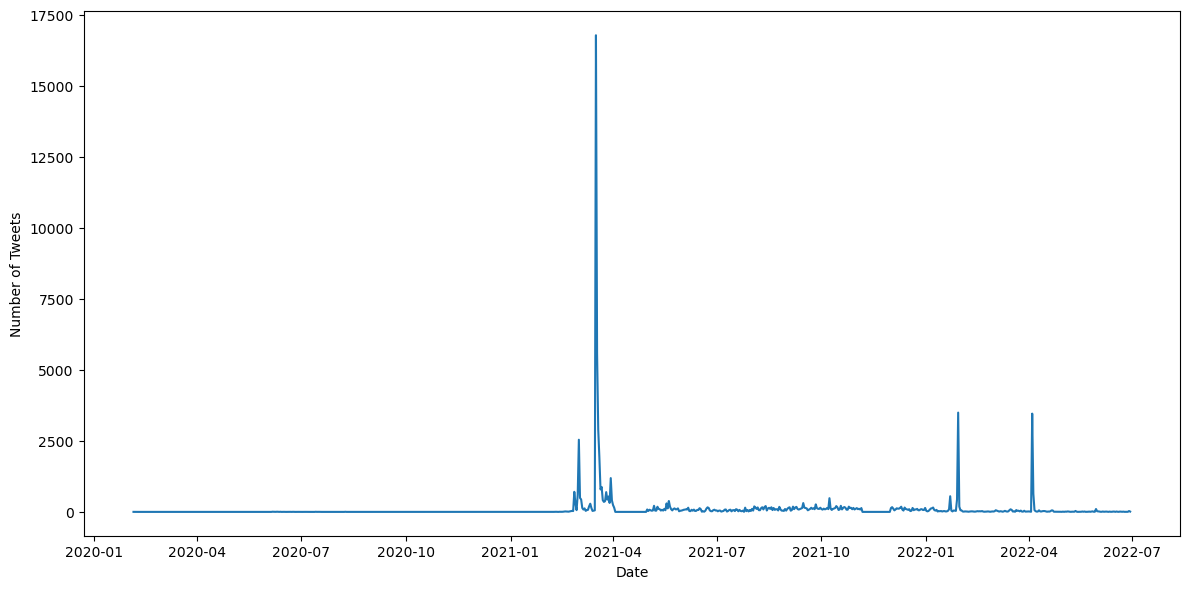

In [21]:
asian = test("asianlives|yellowlives|stopasianhate|stopaapihate")
testasian = tweet_v(asian)

# testasian = filtr(testasian,"2020-05-25","2020-06-20")

plt.figure(figsize=(12, 6))
plt.plot(testasian['date_ymd'], testasian['tweet_count'], label='Tweet Volume')
plt.xlabel('Date')
plt.ylabel('Number of Tweets')
plt.tight_layout()

        date2  tweet_count
36 2020-02-28            3
37 2020-02-29           19
38 2020-03-01           60
39 2020-03-02           10
40 2020-03-03           29


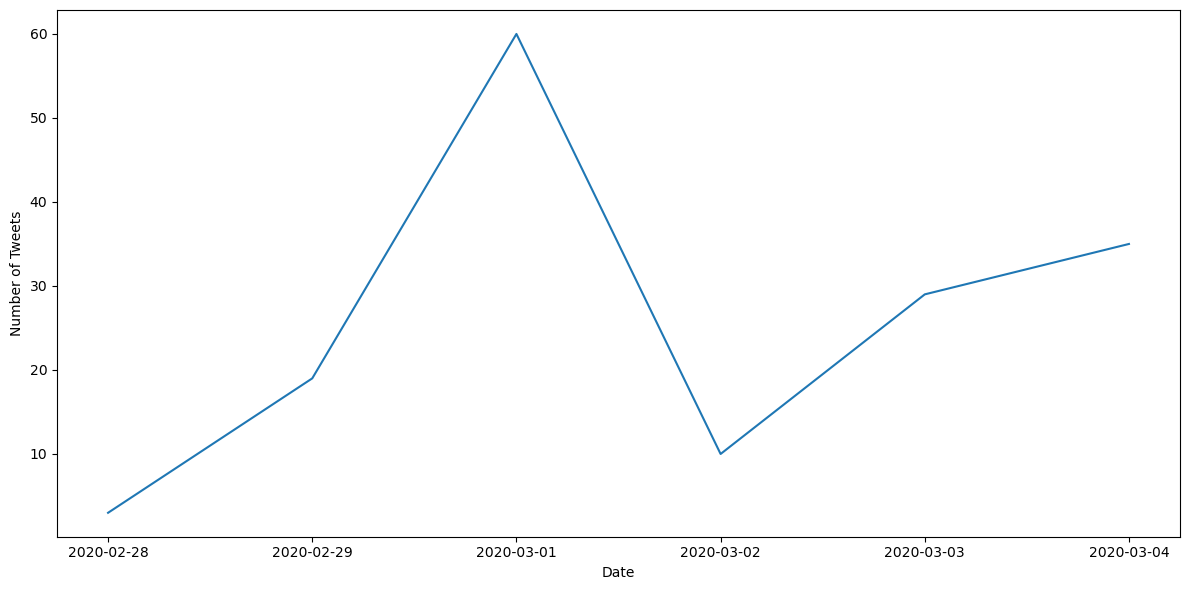

In [22]:
covid = test("covid|coronavirus|pandemic|pfizer|moderna|omicron variant|delta variant")
testcovid = tweet_v(covid)

testcovid = filtr(testcovid,"2020-02-28","2020-03-04")
print(testcovid.head())
plt.figure(figsize=(12, 6))
plt.plot(testcovid['date_ymd'], testcovid['tweet_count'], label='Tweet Volume')
plt.xlabel('Date')
plt.ylabel('Number of Tweets')
plt.tight_layout()

In [31]:
start_date = datetime.strptime("20-07-2021", "%d-%m-%Y")
end_date = datetime.strptime("30-08-2021", "%d-%m-%Y")
daily_tweets = data

# Date filter
# daily_tweets = data[data['date2'].between(start_date, end_date)]

# Find tweet count for each day
daily_tweets = daily_tweets.resample('D', on='date2').size().reset_index(name='tweet_count')

# Plot 
plt.figure(figsize=(12, 6))
plt.plot(daily_tweets['date_ymd'], daily_tweets['tweet_count'], label='Tweet Volume')
plt.xlabel('Date')
plt.ylabel('Number of Tweets')
plt.tight_layout()

#World events
events = pd.DataFrame([{'Health Emergency': '30-01-2020', 'George Floyd Passes Away': '05-25-2020',
                        'Atlanta Shootings': '16-03-2021', 'Pandemic': '03-11-2020', 'OMICRON Variant': '24-11-2021',
                        'Calgary Vigil': '06-06-2020', 'Gov Jay Inslee': '29-02-2020',
                        'Chauvin for New Trial': '05-05-2021', 'Trump COVID-19': '10-02-2020',
                        'DELTA Variant': '06-15-2021', 'Legislation COVID-19': '04-22-2021'}])

# Y-axis range calculation for text placement
y_min, y_max = plt.ylim()
y_text_placement = y_max + (y_max - y_min) * 0.05  # Adjusting text placement above the top

# Overlay each event
for event, date in events.items():
    date = pd.to_datetime(date)
    plt.axvline(date, color='purple', linestyle='--', linewidth=1)
    plt.text(date, y_text_placement, event, rotation=90, verticalalignment='bottom', horizontalalignment='right',
             color='purple', fontsize=9)

plt.legend()
plt.show()

TypeError: strptime() argument 1 must be str, not Timestamp

### B. Create a timeseries graph of account creation

### 03. What is the relationship between the onset of these current events and the volume of tweets?

In [20]:
def ddmmyyyy(date):
    x = datetime.strptime(date, '%a %b %d %H:%M:%S %z %Y')
    x = x.strftime('%d-%m-%Y')
    return x

data['date2'] = data['date'].apply(ddmmyyyy)
data['date2'] = pd.to_datetime(data['date2'], format='%d-%m-%Y')
start_date = datetime.strptime("20-07-2021", "%d-%m-%Y")
end_date = datetime.strptime("30-08-2021", "%d-%m-%Y")
daily_tweets = data

# Date filter
# daily_tweets = data[data['date2'].between(start_date, end_date)]

# Find tweet count for each day
daily_tweets = daily_tweets.resample('D', on='date2').size().reset_index(name='tweet_count')

# Plot 
plt.figure(figsize=(12, 6))
plt.plot(daily_tweets['date2'], daily_tweets['tweet_count'], label='Tweet Volume')
plt.xlabel('Date')
plt.ylabel('Number of Tweets')
plt.tight_layout()

#World events
events = pd.DataFrame([{'Health Emergency': '30-01-2020', 'George Floyd Passes Away': '05-25-2020',
                        'Atlanta Shootings': '16-03-2021', 'Pandemic': '03-11-2020', 'OMICRON Variant': '24-11-2021',
                        'Calgary Vigil': '06-06-2020', 'Gov Jay Inslee': '29-02-2020',
                        'Chauvin for New Trial': '05-05-2021', 'Trump COVID-19': '10-02-2020',
                        'DELTA Variant': '06-15-2021', 'Legislation COVID-19': '04-22-2021'}])

# Y-axis range calculation for text placement
y_min, y_max = plt.ylim()
y_text_placement = y_max + (y_max - y_min) * 0.05  # Adjusting text placement above the top

# Overlay each event
for event, date in events.items():
    date = pd.to_datetime(date)
    plt.axvline(date, color='purple', linestyle='--', linewidth=1)
    plt.text(date, y_text_placement, event, rotation=90, verticalalignment='bottom', horizontalalignment='right',
             color='purple', fontsize=9)

plt.legend()
plt.show()

01-01-2020


1771     2020-01-24 09:48:33+00:00
10596    2020-01-24 09:56:56+00:00
11024    2020-01-24 09:55:16+00:00
13401    2020-01-24 09:45:31+00:00
14390    2020-01-24 09:41:38+00:00
                    ...           
161184   2022-01-31 15:54:02+00:00
163737   2022-01-31 15:54:54+00:00
167808   2022-01-31 15:56:17+00:00
172957   2022-01-31 15:58:01+00:00
174882   2022-01-31 15:58:40+00:00
Name: date, Length: 1678460, dtype: datetime64[ns, UTC]

---------------------------------------------------------------------------------------------------------------------------------------------
### 04: Sentiment Analysis

In [ ]:
def sentiment(tweets):
    sentiments = tweets['text'].apply(lambda tweet: TextBlob(tweet).sentiment.polarity)
    return sentiments.mean()

In [ ]:
covid = filtr(covid,"2020-02-28","2021-05-06")

# Analyze sentiment
blm_sent = sentiment(blm)
asian_sent = sentiment(asian)
covid_sent = sentiment(covid)

blm_sent, asian_sent, covid_sent

---------------------------------------------------------------------------------------------------------------------------------------------
### OLD STUFF

- Create 'year_posted' from 'date'

In [ ]:
data['date'] = pd.to_datetime(data['date'], format='mixed')
data['year_posted'] = data['date'].dt.year
data['year_posted'] = pd.to_numeric(data['year_posted'])
#print(data.info())
print(data['year_posted'].head(15))

- This function gives us a score to measure credibility depending on how old a account is in comparison with the oldest account

In [ ]:
max_age = int(data['acc_age'].max())
print(f"Oldest Account is {max_age} days or {round(max_age/360)} years old")

def credibility(days):
    if days <= 0 or days > max_age:
        return None
    score = int((days / max_age) * 100)
    score = max(1, score)
    score = min(100, score)  
    if score <= 25:
        cred = "unreliable"
    elif score <= 50:
        cred = "somewhat unreliable"
    elif score <= 75:
        cred = "somewhat reliable"
    else:
        cred = "reliable"
    return cred

- Group the tweets by 'year_posted' and plot it

In [ ]:
plot1 = data.groupby('year_posted').size()
top_year = plot1.idxmax()
top_year_count = plot1.max()

print(f"The year with the highest number of tweets posted is {top_year} with {top_year_count} tweets.")

In [ ]:
plot1.plot(kind='bar', color='skyblue')
plt.title('Amount of Tweets Posted by Year')
plt.xlabel('Year')
plt.ylabel('')

plt.show()

In [ ]:
data['acc_age'] = data['acc_age'].fillna(0).astype(int)
data['credit'] = data['acc_age'].apply(credibility)
# print(data['credit'].head(15))

plot2 = data.groupby('credit').size().reset_index(name='credit_count')

plt.figure(figsize=(8, 8)) 
hue = ['#E32227', '#FFDB58', '#00FF00', '#98fb98']
plt.pie(plot2['credit_count'], labels=['Unreliable', 'Somewhat unreliable', 'Somewhat reliable', 'Reliable'],
        autopct='%1.1f%%', startangle=90, colors=hue)
plt.title('Credibility of tweets between 2020 and 2022 Based on Account Age')
plt.show()

In [ ]:
def year(days):
    downl_year = 2023
    if days <= 0 or days > max_age:
        return 0
    yr_count = days / 365
    yr = downl_year - yr_count
    return int(yr)

data['yr_created'] = data['acc_age'].apply(year)

plot3 = data.groupby('yr_created')['userid'].size().reset_index(name='acc_count')
top5_yr = plot3.nlargest(6, 'acc_count')['yr_created']
colors = ['skyblue' if yr not in top5_yr.values else 'orange' for yr in plot3['yr_created']]

plt.figure(figsize=(10, 6))
plt.bar(plot3['yr_created'], plot3['acc_count'], color= colors)
plt.title('Amount of Accounts Created by Year')
plt.xlabel('Year')
plt.ylabel('Number of Accounts')
plt.xlim(2007, 2023)
plt.ylim(0, 9000)
plt.xticks(range(2007, 2023, 1))

plt.show()